In [97]:

%load_ext autoreload
%autoreload 2

import os
from glob import glob
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
from fastparquet import ParquetFile
from natsort import natsorted
from pickle_blosc import unpickle
from scipy.signal import correlate, correlation_lags
from scipy.stats import pearsonr
from tqdm import tqdm

from seisnet.dataloaders import (CorrelationTable, Normalize,
                                 create_local_session)
from seisnet.utils import (get_data_dir, get_repo_dir,
                           load_picks_without_ridgecrest)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# data = load_picks_without_ridgecrest(f"{get_data_dir()}/metadata/picks.csv")
data = pd.read_csv(f"{get_data_dir()}/AML/hawaii_arrivals.csv")

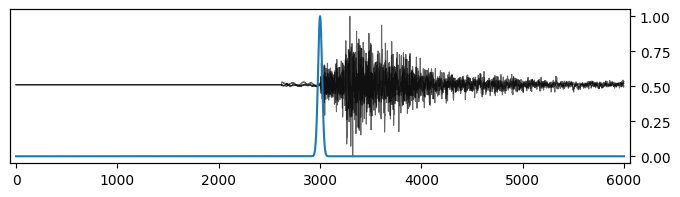

In [35]:
# hawaii_picks_df[hawaii_picks_df.evid==42901086]
file = np.load(f"{get_data_dir()}/train_npz/nc106586--PG.AR..EH.npz")
# np.where(file["evids"]==42920779)
fig,ax = plt.subplots(figsize=(8,2))
ax.plot(file["X"].T,c="k",lw=0.8,alpha=0.6)
ax.margins(x=0.01)
ax.set_yticks([])
ax = ax.twinx()
ax.plot(file["y"].T)
# plt.xlim(2500,3500)
# plt.axvline(2995, ls="--")
# plt.axvline(3000)
plt.show()

In [54]:
file["X"]

array([[ 0.        ,  0.        ,  0.        , ...,  0.01737251,
         0.01536129,  0.01435568],
       [ 0.        ,  0.        ,  0.        , ..., -0.0285698 ,
        -0.02253614, -0.01449125],
       [ 0.        ,  0.        ,  0.        , ...,  0.046275  ,
         0.04426378,  0.046275  ]], shape=(3, 6000), dtype=float32)

In [3]:
files = pl.read_parquet(f"{get_repo_dir()}/grp_wvfms.parquet")

In [7]:
classes = files["labels"].n_unique()

In [ ]:
prefix = f"{get_data_dir()}/train_npz/"

files.with_columns(
    (prefix + pl.col("waveform_name") + ".npz").alias("waveform_name")
)


'/Users/josesomojola/Data/train_npz/nc71593200--NC.MMX1..HN.npz'

In [2]:
ff = np.load(f"{get_repo_dir()}/large_file.npz", mmap_mode='r')

In [3]:
import mlflow
from mlflow.tracking import MlflowClient
from seisnet.utils import get_repo_dir

In [22]:
mlflow.set_tracking_uri(f"{get_repo_dir()}/mlruns") # Define the root mlruns directory
client = MlflowClient()
exp = client.get_experiment_by_name("Phasenet-Pytorch-Sparse-Waveform-Experiment")#Sparse #Random
exp_id = exp.experiment_id

In [23]:
runs = mlflow.search_runs(experiment_ids=[exp_id])

# select_uuids = ["e4481a9e","fcb9e4f2","a28b4265","e36acf99","86c6e42c","dce4c12d",
#                 "6befda52","0bd16fde","79c5e22e","4ff360e0","95ed0d91",]
select_uuids = ["e01718b8","2eab6925","59c68b09","1fce8587","0eb8c708",]
print(len(runs))
runs = runs[~runs["params.model_uuid"].isin(select_uuids)].reset_index(drop=True)
print(len(runs))

34
29


In [85]:
files = glob(f"{get_data_dir()}/test_ridgecrest/*.npz")

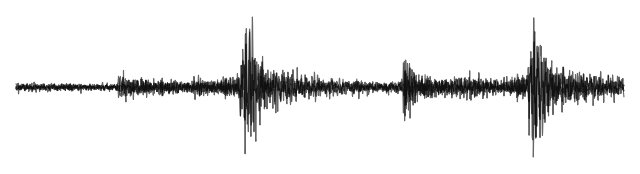

In [95]:

file = np.load(files[8], allow_pickle=True)
fig,ax = plt.subplots(figsize=(8,2))
ax.plot(file["X"].T,c="k",lw=0.8,alpha=0.6)
ax.margins(x=0.01)
ax.set_yticks([]), ax.axis("off")
# ax = ax.twinx()
# ax.plot(file["y"].T)
plt.show()

In [74]:
file = np.load(f"{get_data_dir()}/large_files/ridgecrest_file.npz",allow_pickle=True)

In [67]:
file.keys()

KeysView(NpzFile '/Users/josesomojola/Data/ridgecrest_file.npz' with keys: X, y, pIdx, sIdx)

In [76]:
np.where(file["sIdx"]).replace(None,np.nan)

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [80]:
sidx_clean,file["pIdx"]

(array([1446.,   nan, 1583., ..., 2568.,   nan,   nan],
       shape=(174491,), dtype=float32),
 array([ 921, 2495, 1343, ..., 2446, 2269,  697], shape=(174491,)))

In [78]:
sidx_clean = np.where(file["sIdx"] == None, np.nan, file["sIdx"]).astype(np.float32)

In [81]:
53.33+12.57+0.46+2.8+12.86+1.82+162.52

246.36

In [82]:
file = np.load(f"{get_data_dir()}/large_files/ridgecrest_file.npz",allow_pickle=True,mmap_mode="r")

In [84]:
file["X"].shape

(174491, 3, 3000)

In [ ]:
tups = [("602bb8b0bdd84e868789a962113c7729","8c69c464"),
        ("4fb65866bcc54b59bbd44faa1ea0ea87","f8b6fc3a"),
        ("2d2b7a0c2e324ebb8455da214292ce71","c6d4d288"),
        ("68a21a1eab8f4b5294d19c6b91c4c602","79cb833e"),
        ("6ecfc7e2c4c846fea9e0043fd7f679c9","1a26b974"),
        ("fb5288e4aec54e14b27b2e693780b315","42e9afab"),
        ("338f837749ea4669a5033a51d6d58abd","d0da20ec"),
        ("ec339407044a444daccec1d745cd1967","486eabf6"),
        ("bd4b1cc57acc40caa2e9f2b7c020638e","e6abe84b"),
        ("94b3d394564f45a1a6512d0f1d0d42b8","d6a3a1c7"),
        ("26009589a3b24f1880d57d62517d34fd","1bde61cc"),
        ("b6431cf431534e3eacaf341de98f5a37","25da2d9d"),
        ("a46353abd5d449ef8e0baa3a0cf4d14d","6f81c36c"),
        ("5fe8f9e5df2b45e8a1b750c0e6fb7298","1d43520b"),
        ("1f54d616dd5a45629d00f8570df36b74","f328009b"),
        ("46c76145013f4523ac78a30f91cbbd58","9bb9d447"),
        ("0b74a6b5e2f94759a9a781ac53f84147","c1f19962"),
        ("8d7f06e0dd5d4541bf69d49d6dd46f00","082e9f5a"),
        ("0511ff9db13d4f53a8f60f9f434d5b3e","b68dc10a"),
        ("c305f8cb59f448a8a5f77521674afcec","6c61c433"),
        ("16d6b18e30824246bf1632be81bee30c","28da5211"),
        ("fa14d07bd9d54357a77793a4d4f6f83c","c6682d15"),
        ("6b3f8f22711548e8bdf3f9272e67d29c","5b41d5a6"),
        ("dc6ebbc0f48149f3bab9c0143ea11602","41842cba"),
        ("23a129c647e14b6187063852174b7bc9","b8c724b3"),
        ("320b66bbe2b14e14a7273ffc6dc08600","9eec2245"),
        ("648d930ff0db40efbe90c974b5d18d31","f1408192"),
        ("ca5c8015848343408027ca90e27eee27","3c90e5b9"),
        ("329579f4e79a4df0b08251181c056ff4","0110818c"),
        ("614b65fe729b432f9cd609b587c3ba3d","3b72ecff"),
        ("9d2af3dad90d41bcaee73acfe0fa3418","4da32722"),
        ("2490c96489d747c3a0921db6d1ce3c62","fd03c220"),
        ("5532cd54c448444e8cce7e52e0b6c55e","280db935"),
        ("396d9fcd5d8e4aa3b42c02bcbcf73cb6","f3429f70"),
        ("6715483861a64d44a4deae28f7e6e193","5cefe561"),
        ("52a227aaab9e4683bfeab32e20926c1d","372c313b"),
        ("e97c9a6d687540789d08d8c475ca1018","7ad7d288"),
        ("ddb5e2723a014ca3915ba644c15af65f","86ae722b"),
        ("731c6458ce9b4876965da5d9ebdf984c","fa3338b2"),
        ("993230c23edf44838119e9026484ce0f","21dbfb7b"),
        ("5c8b54f9683547b0890c0fbf64bdfe53","b1939e69"),
        ("195a0ab55e25430091f4f8bf63727820","151e9e24"),
        ("159d400b29254650ab0c395e0a986cbe","3c79a11b"),
        ("6408df90c6db4bafb41dfbc4e9f91a70","ebf5051a"),
        ("20afc7b9f34041abb13799c184842cf0","748ca054"),
        ("d3d16ecbcabe449e9cf087fbef4666b8","62a272eb"),
        ("0d659052362e4d0eb3e429f39a351541","2297cd26"),
        ("8641331812454265882852b2ab09521a","2f32e6dd"),
        ("a9b28eb6fee245019f3b2e6eac78d361","86dc813a"),
        ("2cf9c6fa9a7d4217a1ad57a682e6136e","39c1b808"),
        ("373330e369db4dbdac0acefcc768ef29","16f496fd"),
        ("a32458afd6e94fc7833be6e4389c44b7","69e0758e"),
        ("5d9baff35d964876844379e3ef8f184c","8160a4e8"),
        ("a70d0a5a6777490b854e23002372ccca","a1936513"),
        ("9e821290b20f49f08e61b76fb03ae198","a1e83c54"),
        ("632a5f3e62f64f3c9c64e5ed6e00102e","ce555b66"),
        ("5dafdbfb9c2143c5826c509e37cd28a1","30eb7c99"),
        ("31ae73e3116b4e0cb5d82ac60c9abbaa","393e133d"),
        ("a4c3f7013fc845e5a09bfef43510d687","c11baca9"),
        ("23a2a2f6504a463f91dc9ff6df520527","c4769f2d"),
        ("98344abf832c451cac1127b55f86dffa","fc2682eb"),
        ("af1f860385394367a69c9a714806ec44","3123b4c2"),
        ("a80787580d3f40739869a22b19b16185","a99a1bd0"),
        ("d051f5b7ff5b4c919aa33c1ee0efe587","d1e5106d"),
        ("5d9a47ff12794d58bd662a82bff6bbb5","142915f1"),
        ("47645ca7cb0d4364a6d1b371cf939b62","5b471ee9"),
        ("0887faeb8f8b44299381566b5f7925fc","7e16c500"),
        ("0d1594d2f09947768897c6c875a19029","09fab0b7"),
        ("2d5796e2c057474c95aa25b01a4ab38d","825c1cc0"),
        ("3d4d3bfc9a0b494aab0c74d6c5437da9","85ba1367"),
        ("e80a906e9c284d14b4b78c28ffea7546","2d4cbcf1"),
        ("457c0355faaf48d5ae052d382277ca78","30040981"),
        ("a3e04e6e0f8d4140a64937a4173eacf9","a27d5e9f"),
        ("549234c73ae747129eaa72162dd9b972","f5876c9a"),
        ("26109527e52a40fe845b83fd6d97e69a","bc52fd3e"),
        ("66243af0219c4058ba727fc3a44caf2b","3b797e2c"),
        ("66718d6f08794c739abfc53163dfd013","d883ce10"),
        ("58aa7f9b91444a2ba4fdc3b71bf231cf","fbb5caa3"),
        ("d30912513e1b4592a70930db30a81a74","fc98d1ac"),
        ("98b0ce71fb634be99d230fd00643985c","10907efd"),
        ("b3c99d423af34582938809c7233b4e06","8dcc32b3"),
        ("52b216368f864601ad622068105b0efd","ae558cdd"),
        ("b39dfb8d24364191a24d8d48ecc273fa","a239dbde"),
        ("871777db2e454e8189d7d8fe784a2c2c","83b2efae"),
        ("2daea68da7da4f0c8d1e3b18edeeb2e2","eeeb36a9"),
        ("2f6e6b35fcbc42b7b874e12ab35effe5","df08b653"),
        ("71ce4f7e623d48cf85f8b5a1ed766063","36e01cec"),
        ("8be32e9b22544ef285319f40a91381f4","3d3d4115"),
        ("80b4a0c5383f43eaafdc3d6c7572b5a9","34b097f4"),
        ("fff0b4a4e5794edeaa4dac9b7db0ffd4","75095f52"),
        ("96ac0e19f5f6446789810206d9eeadb8","24c08233"),
        ("d838733445544c349106544183c3266b","d42f3c28"),
        ("e3b2139e1e354d7a9aadf27e443d3544","4998fc8d"),
        ("3bbea446a03f44df979d9a6b814649e5","6a6850f6"),
        ("1752c787c5cb4e5182a43f098884445c","574d30d7"),
        ("677e081ce76644e2b9b58542104ded5d","6056534c"),
        ("535ac2af89144698bc0ec07ca49582b5","9fd68e06"),
        ("2bda6bd0dc5f4297a31034f5f49624d9","16950700"),
        ("71771aa3048b46fbb8a70091c5c5926c","e65ce341"),
        ("d995928741a341639d31bb3a5a4a9009","cc2f400d"),
        ("2710ad5239584e0a915ea9111850357c","3d56bd2d"),
        ("8482003ac4dd4c86b785a83485e45d4e","fc3e3920"),
        ("3e03f465b79840dd90a776ac66d88a12","40759172"),
        ("431fe66410aa412d8e52a26bb15e02cf","5ff016d3"),
        ("144b447e716548b2bd71a96180e2215a","55d9d7e0"),
        ("93a19c077a4346429e3c36de4bc10949","ac78132f"),
        ("6cd6a0c95afb4347b55c0d3046cbdf4c","71237bb3"),
        ("c1c2de6d9dbf474d86692a0be68f68a7","0878d1ab"),
        ("5f50597a11584d4789fcf2667e1e771a","b2dda203"),
        ("2cc9c5aa6ad54dc2a4dd56ab4a730fc2","61b066f4"),
        ("223ed84c32804921ae311f8a3c99ff17","74beb110"),
        ("1c183173ad5446b6b49a09247418a828","0e2ba3e4"),
        ("00324e26b254483fb1e7a7491c405ed7","bc63a05c"),
        ("ebd7c5e9a19645bda75dc2d23fd80288","9f913164"),
        ("e45d019d00a04ff2815ecbee3ef5dd67","89df7254"),
        ("bb5821a62ca54b79944126f0440019d6","24347cac"),
        ("cf69139c18324d3c98cc0838d30f02f7","41b9ebb4"),
        ("369b9e2d957c4ed5bdd72348d8aee762","35eae2de"),
        ("edba2aadbb354952bbadadc63e7925b3","82d9f461")
]

for tup in tups:
    rid,mid = tup
    print(f"poetry run evaluate_model -mid {mid} -rid {rid} -ncls 1 -r")#

In [ ]:
# import mlflow
# from mlflow.tracking import MlflowClient

# mlflow.set_tracking_uri(f"{get_repo_dir()}/mlruns") # Define the root mlruns directory
client = MlflowClient()

exp = client.get_experiment_by_name("Phasenet-Pytorch-Random-Waveform-Experiment")#
exp_id = exp.experiment_id
runs = mlflow.search_runs(experiment_ids=[exp_id])

rids = ["602bb8b0bdd84e868789a962113c7729","4fb65866bcc54b59bbd44faa1ea0ea87","2d2b7a0c2e324ebb8455da214292ce71","68a21a1eab8f4b5294d19c6b91c4c602","6ecfc7e2c4c846fea9e0043fd7f679c9","fb5288e4aec54e14b27b2e693780b315","338f837749ea4669a5033a51d6d58abd","ec339407044a444daccec1d745cd1967","bd4b1cc57acc40caa2e9f2b7c020638e","94b3d394564f45a1a6512d0f1d0d42b8","26009589a3b24f1880d57d62517d34fd","b6431cf431534e3eacaf341de98f5a37","a46353abd5d449ef8e0baa3a0cf4d14d","5fe8f9e5df2b45e8a1b750c0e6fb7298","1f54d616dd5a45629d00f8570df36b74","46c76145013f4523ac78a30f91cbbd58","0b74a6b5e2f94759a9a781ac53f84147","8d7f06e0dd5d4541bf69d49d6dd46f00","0511ff9db13d4f53a8f60f9f434d5b3e","c305f8cb59f448a8a5f77521674afcec","16d6b18e30824246bf1632be81bee30c","fa14d07bd9d54357a77793a4d4f6f83c","6b3f8f22711548e8bdf3f9272e67d29c","dc6ebbc0f48149f3bab9c0143ea11602","23a129c647e14b6187063852174b7bc9","320b66bbe2b14e14a7273ffc6dc08600","648d930ff0db40efbe90c974b5d18d31","ca5c8015848343408027ca90e27eee27","329579f4e79a4df0b08251181c056ff4","614b65fe729b432f9cd609b587c3ba3d","9d2af3dad90d41bcaee73acfe0fa3418","2490c96489d747c3a0921db6d1ce3c62","5532cd54c448444e8cce7e52e0b6c55e","396d9fcd5d8e4aa3b42c02bcbcf73cb6","6715483861a64d44a4deae28f7e6e193","52a227aaab9e4683bfeab32e20926c1d","e97c9a6d687540789d08d8c475ca1018","ddb5e2723a014ca3915ba644c15af65f","731c6458ce9b4876965da5d9ebdf984c","993230c23edf44838119e9026484ce0f","5c8b54f9683547b0890c0fbf64bdfe53","195a0ab55e25430091f4f8bf63727820","159d400b29254650ab0c395e0a986cbe","6408df90c6db4bafb41dfbc4e9f91a70","20afc7b9f34041abb13799c184842cf0","d3d16ecbcabe449e9cf087fbef4666b8","0d659052362e4d0eb3e429f39a351541","8641331812454265882852b2ab09521a","a9b28eb6fee245019f3b2e6eac78d361","2cf9c6fa9a7d4217a1ad57a682e6136e","373330e369db4dbdac0acefcc768ef29","a32458afd6e94fc7833be6e4389c44b7","5d9baff35d964876844379e3ef8f184c","a70d0a5a6777490b854e23002372ccca","9e821290b20f49f08e61b76fb03ae198","632a5f3e62f64f3c9c64e5ed6e00102e","5dafdbfb9c2143c5826c509e37cd28a1","31ae73e3116b4e0cb5d82ac60c9abbaa","a4c3f7013fc845e5a09bfef43510d687","23a2a2f6504a463f91dc9ff6df520527","98344abf832c451cac1127b55f86dffa","af1f860385394367a69c9a714806ec44","a80787580d3f40739869a22b19b16185","d051f5b7ff5b4c919aa33c1ee0efe587","5d9a47ff12794d58bd662a82bff6bbb5","47645ca7cb0d4364a6d1b371cf939b62","0887faeb8f8b44299381566b5f7925fc","0d1594d2f09947768897c6c875a19029","2d5796e2c057474c95aa25b01a4ab38d","3d4d3bfc9a0b494aab0c74d6c5437da9","e80a906e9c284d14b4b78c28ffea7546","457c0355faaf48d5ae052d382277ca78","a3e04e6e0f8d4140a64937a4173eacf9","549234c73ae747129eaa72162dd9b972","26109527e52a40fe845b83fd6d97e69a","66243af0219c4058ba727fc3a44caf2b","66718d6f08794c739abfc53163dfd013","58aa7f9b91444a2ba4fdc3b71bf231cf","d30912513e1b4592a70930db30a81a74","98b0ce71fb634be99d230fd00643985c","b3c99d423af34582938809c7233b4e06","52b216368f864601ad622068105b0efd","b39dfb8d24364191a24d8d48ecc273fa","871777db2e454e8189d7d8fe784a2c2c","2daea68da7da4f0c8d1e3b18edeeb2e2","2f6e6b35fcbc42b7b874e12ab35effe5","71ce4f7e623d48cf85f8b5a1ed766063","8be32e9b22544ef285319f40a91381f4","80b4a0c5383f43eaafdc3d6c7572b5a9","fff0b4a4e5794edeaa4dac9b7db0ffd4","96ac0e19f5f6446789810206d9eeadb8","d838733445544c349106544183c3266b","e3b2139e1e354d7a9aadf27e443d3544","3bbea446a03f44df979d9a6b814649e5","1752c787c5cb4e5182a43f098884445c","677e081ce76644e2b9b58542104ded5d","535ac2af89144698bc0ec07ca49582b5","2bda6bd0dc5f4297a31034f5f49624d9","71771aa3048b46fbb8a70091c5c5926c","d995928741a341639d31bb3a5a4a9009","2710ad5239584e0a915ea9111850357c","8482003ac4dd4c86b785a83485e45d4e","3e03f465b79840dd90a776ac66d88a12","431fe66410aa412d8e52a26bb15e02cf","144b447e716548b2bd71a96180e2215a","93a19c077a4346429e3c36de4bc10949","6cd6a0c95afb4347b55c0d3046cbdf4c","c1c2de6d9dbf474d86692a0be68f68a7","5f50597a11584d4789fcf2667e1e771a","2cc9c5aa6ad54dc2a4dd56ab4a730fc2","223ed84c32804921ae311f8a3c99ff17","1c183173ad5446b6b49a09247418a828","00324e26b254483fb1e7a7491c405ed7","ebd7c5e9a19645bda75dc2d23fd80288","e45d019d00a04ff2815ecbee3ef5dd67","bb5821a62ca54b79944126f0440019d6","cf69139c18324d3c98cc0838d30f02f7","369b9e2d957c4ed5bdd72348d8aee762","edba2aadbb354952bbadadc63e7925b3",]
runs = runs[runs["run_id"].isin(rids)].reset_index(drop=True)

for idx, row in runs[["run_id","params.model_uuid"]].iterrows():
    print(row["run_id"],row["params.model_uuid"])

In [71]:
runs["params.model_uuid"].to_list()

['8c69c464',
 'f8b6fc3a',
 'c6d4d288',
 '79cb833e',
 '1a26b974',
 '42e9afab',
 'd0da20ec',
 '486eabf6',
 'e6abe84b',
 'd6a3a1c7',
 '1bde61cc',
 '25da2d9d',
 '6f81c36c',
 '1d43520b',
 'f328009b',
 '9bb9d447',
 'c1f19962',
 '082e9f5a',
 'b68dc10a',
 '6c61c433',
 '28da5211',
 'c6682d15',
 '5b41d5a6',
 '41842cba',
 'b8c724b3',
 '9eec2245',
 'f1408192',
 '3c90e5b9',
 '0110818c',
 '3b72ecff',
 '4da32722',
 'fd03c220',
 '280db935',
 'f3429f70',
 '5cefe561',
 '372c313b',
 '7ad7d288',
 '86ae722b',
 'fa3338b2',
 '21dbfb7b',
 'b1939e69',
 '151e9e24',
 '3c79a11b',
 'ebf5051a',
 '748ca054',
 '62a272eb',
 '2297cd26',
 '2f32e6dd',
 '86dc813a',
 '39c1b808',
 '16f496fd',
 '69e0758e',
 '8160a4e8',
 'a1936513',
 'a1e83c54',
 'ce555b66',
 '30eb7c99',
 '393e133d',
 'c11baca9',
 'c4769f2d',
 'fc2682eb',
 '3123b4c2',
 'a99a1bd0',
 'd1e5106d',
 '142915f1',
 '5b471ee9',
 '7e16c500',
 '09fab0b7',
 '825c1cc0',
 '85ba1367',
 '2d4cbcf1',
 '30040981',
 'a27d5e9f',
 'f5876c9a',
 'bc52fd3e',
 '3b797e2c',
 'd883ce10',

In [ ]:
[]